# Data Integration

Data integration is a set of processes used to retrieve and combine data from separated sources into meaningful and valuable information. A complete data integration solution delivers trusted data from a variety of sources. Analytics methodologies can then be applied to the integrated data, to produce meaningful insights. 


In Pandas there are different functions that can help us do that easily which are

*   `pd.merge()`,for combining data on common columns or indices.
*   `DataFrame.join()`,  for combining data on a key column or an index
*   `pd.concat()`,for combining DataFrames across rows or columns

In [1]:
import pandas as pd

In this exercise, we'll merge the details of students from two datasets, namely `student.csv` and `marks.csv`. The student dataset contains columns such as *Age*, *Gender*, *Grade*, and *Employed*. The `marks.csv` dataset contains columns such as *Mark* and *City*. **The *Student_id* column is common between the two datasets.**

The `student.csv` dataset:  https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/student.csv

The `marks.csv` dataset:  https://github.com/TrainingByPackt/Data-Science-with-Python/blob/master/Chapter01/Data/mark.csv
 

Let's first inspect our datasets.

In [2]:
df_students = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/student.csv')
df_students.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


In [3]:
df_marks = pd.read_csv('https://raw.githubusercontent.com/TrainingByPackt/Data-Science-with-Python/master/Chapter01/Data/mark.csv')
df_marks.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


In [4]:
df_students.shape

(232, 5)

In [5]:
df_marks.shape

(232, 3)

To integrate the above 2 datasets into 1 based on the student ID, you may use the `merge` function, and pass the dataframes you would like to integrate. The default behavior of the `merge` function is to perform an inner join using the intersection of the columns from both dataframes as the join keys.

In [6]:
df = pd.merge(df_students, df_marks)
df

,Student_id,Age,Gender,Grade,Employed,Mark,City
0,1,19,Male,1st Class,yes,95,Chennai
1,2,20,Female,2nd Class,no,70,Delhi
2,3,18,Male,1st Class,no,98,Mumbai
3,4,21,Female,2nd Class,no,75,Pune
4,5,19,Male,1st Class,no,89,Kochi
...,...,...,...,...,...,...,...
227,228,21,Female,1st Class,no,99,Pune
228,229,20,Male,2nd Class,no,70,Chennai
229,230,20,Male,3rd Class,yes,55,Delhi
230,231,19,Female,1st Class,yes,97,Mumbai


The `pd.merge()` function recognizes that each DataFrame has an *Student_id* column, and automatically joins using this column as a key. The result of the merge is a new DataFrame that combines the information from the two inputs.

Even though, this dataset has ordered entries in both datasets, it is not necessairly that the order of entries in each column should be maintained: in this case, if the order of the *Student_id* column differs between df_students and df_marks, and the `pd.merge()` function would have correctly accounted for this.

Additionally, keep in mind that the merge in general discards the index, except in the special case of merges by index (see the left_index and right_index keywords, discussed momentarily).

Now that we get an essence of how `pd.merge()` works. Let's dive in into the different types of joins in `pd.merge()`.

## pd.merge() Relationship Types

The `pd.merge()` function implements a number of types of integrations: the *one-to-one*, *many-to-one*, and *many-to-many*.
All three types are accessed via an identical call to the `pd.merge()` interface; the type of integration performed depends on the form of the input data.
Here we will show simple examples of the three types of merges, and discuss detailed options further below.

### One-to-one Integration

Perhaps the simplest type of merge expresion is the one-to-one integration, which is in many ways very similar to the column-wise concatenation.

As a concrete example, consider the following two `DataFrames` which contain information on several employees in a company:

In [7]:
df_employees = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df_employees_hire_date = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df_employees, df_employees_hire_date)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


Remeber `pd.concat` is so similar to pd.merge one-to-one integrations. However, the order should be be maintained in both dataframes that are to be merged. Therefore, you will find that the below concat doesn't really do what we intended to do.

In [8]:
pd.concat([df_employees, df_employees_hire_date],axis=1)

,employee,group,employee,hire_date
0,Bob,Accounting,Lisa,2004
1,Jake,Engineering,Bob,2008
2,Lisa,Engineering,Jake,2012
3,Sue,HR,Sue,2014


Hence, we will go with `pd.merge()` to merge the above datasets.

In [9]:
employees_one_to_one_df = pd.merge(df_employees, df_employees_hire_date)
employees_one_to_one_df

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Many-to-one Integration
Many-to-one integrations are integrations in which one of the two key columns contains duplicate entries. For the many-to-one case, the resulting DataFrame will preserve those duplicate entries as appropriate. Consider the following example of a many-to-one integration where we assign a supervisor to each employee based on *group*:

In [10]:
group_supervisors_df = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(employees_one_to_one_df, group_supervisors_df, pd.merge(employees_one_to_one_df, group_supervisors_df))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


Note that the resulting dataset added a supervisor to each employee based on group. Therefore, we can find replicas of the same supervisor within the rows.

### Many-to-many Integration
Many-to-many integrations are a bit confusing conceptually, but are nevertheless well defined. If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge. This will be perhaps most clear with a concrete example. Consider the following, where we have a DataFrame showing one or more skills associated with a particular group. By performing a many-to-many integration, we can recover the skills associated with any individual person:

In [11]:
group_skills_df = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display(df_employees, group_skills_df, pd.merge(df_employees, group_skills_df))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


As you might have noticed, for each employee of a certain group, the skills of that group is added.

## pd.merge() arguments
The are several arguments in the merge function that are of a good use. Let's start by looking at the easiest of them.

### The `on` argument

The `on` argument allows us to explicitly type the name(s) of the column we would like to integrate on.

In [12]:
df_employees1 = pd.DataFrame({'first_name': ['Bob','Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting','HR', 'Engineering', 'Engineering', 'HR'],'last_name': ['Mark','Hall', 'Wilson', 'George', 'Adam']})
df_employees_hire_date1 = pd.DataFrame({'first_name': ['Lisa', 'Bob', 'Jake','Bob','Sue'],'last_name': ['George', 'Mark', 'Wilson', 'Hall', 'Adam'],
                    'dates': [2004, 2008, 2012, 2014, 2016]})
df_merged = pd.merge(df_employees1,df_employees_hire_date1,on=['first_name', 'last_name'])
df_merged_default = pd.merge(df_employees1,df_employees_hire_date1)
display(df_employees1, df_employees_hire_date1, df_merged_default, df_merged)

,first_name,group,last_name
0,Bob,Accounting,Mark
1,Bob,HR,Hall
2,Jake,Engineering,Wilson
3,Lisa,Engineering,George
4,Sue,HR,Adam


,first_name,last_name,dates
0,Lisa,George,2004
1,Bob,Mark,2008
2,Jake,Wilson,2012
3,Bob,Hall,2014
4,Sue,Adam,2016


,first_name,group,last_name,dates
0,Bob,Accounting,Mark,2008
1,Bob,HR,Hall,2014
2,Jake,Engineering,Wilson,2012
3,Lisa,Engineering,George,2004
4,Sue,HR,Adam,2016


,first_name,group,last_name,dates
0,Bob,Accounting,Mark,2008
1,Bob,HR,Hall,2014
2,Jake,Engineering,Wilson,2012
3,Lisa,Engineering,George,2004
4,Sue,HR,Adam,2016


### The `left_on` and `right_on` arguments

At times you may wish to merge two datasets with different column names; for example, we may have a dataset in which the employee name is labeled as *name* rather than *employee*. In this case, we can use the left_on and right_on keywords to specify the two column names:

In [13]:
df_names_and_salaries = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
df_merged = pd.merge(df_employees,df_names_and_salaries, left_on="employee", right_on="name")
display(df_employees, df_names_and_salaries, df_merged)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


Notice that the employee and name columns are both existent in the new dataframe. Therefore, as part of cleaning we have to drop one and keep the other.

In [14]:
df_merged_clean = df_merged.drop(['name'], axis=1)
df_merged_clean.head()

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


### Indicies Merge
What if we want to merge based on indicies rather than column names? We first need to make sure that there are relevant indicies to integrate on. Let's start by creating an indicies for the `df_employees` and `df_names_and_salaries` dataframes. Next we'll merging them together using the `left_index` and `right_index` arguments.

In [15]:
df_employees_indexed = df_employees.set_index('employee')
df_names_and_salaries_indexed = df_names_and_salaries.set_index('name')

display(df_employees_indexed,df_names_and_salaries_indexed,pd.merge(df_employees_indexed,df_names_and_salaries_indexed,left_index=True, right_index=True))

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,salary
name,
Bob,70000
Jake,80000
Lisa,120000
Sue,90000


,group,salary
employee,,
Bob,Accounting,70000
Jake,Engineering,80000
Lisa,Engineering,120000
Sue,HR,90000


## pd.merge() Join Types

As you might have studied, there are different types of joins between tables. Those are: inner, outer, left, and right.

By default, the `pd.merge` does an inner join. Therefore, in the column we are joining based on, only the values that are common in both dataframes we are merging based on are kept, and the rest are not merged.



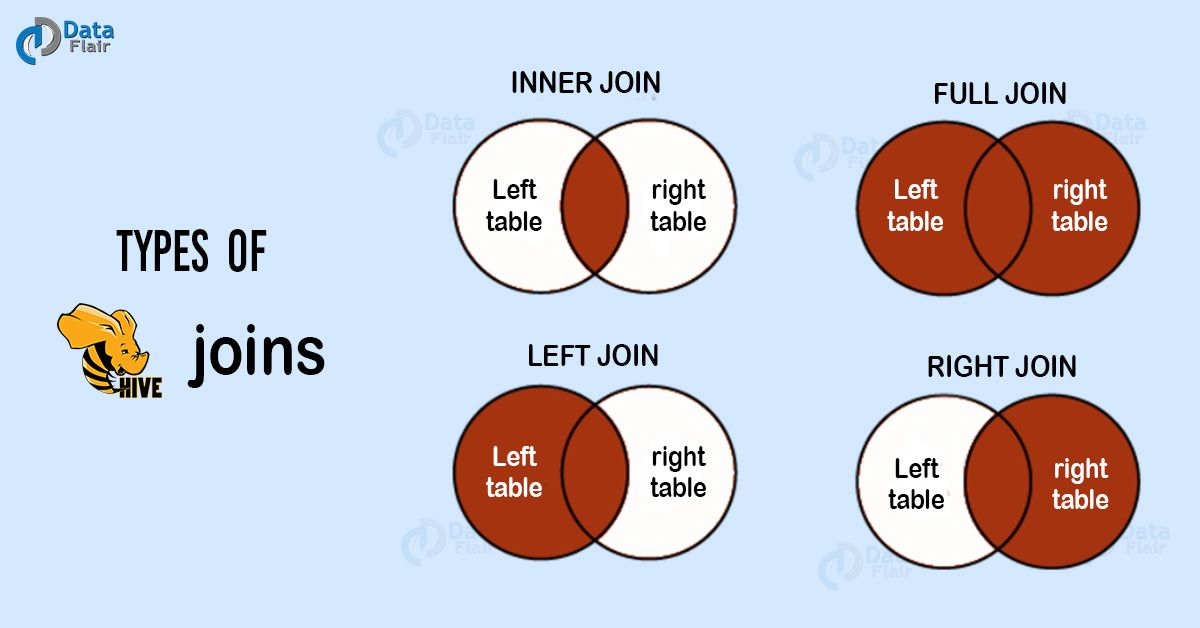

To specify the type of join we use the `how` argument inside the pd.merge. This argument can be set to 4 values: 



1.  *left*: use only keys from left frame, similar to a SQL left outer join; preserve key order.
2.  *right*: use only keys from right frame, similar to a SQL right outer join; preserve key order.
3. *outer*: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
4. *inner*: use intersection of keys from both frames, similar to a SQL inner join; preserve the order of the left keys.


Let's take a look at an example for each.:

### Inner Join

In [16]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display(df6, df7, pd.merge(df6, df7))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Mary,bread,wine


Here we have merged two datasets that have only a single *name* entry in common: Mary. By default, the result contains the intersection of the two sets of inputs; this is what is known as an inner join. We can specify this explicitly using the how keyword, which defaults to *inner*:

In [17]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


### Outer Join

In [18]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


Notice how the values that aren't common in both are filled with NaNs

### Left and Right Joins


The left join and right join return joins over the left entries and right entries, respectively. For example:

In [19]:
pd.merge(df6, df7, how='left') # left -> food

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [20]:
pd.merge(df6, df7, how='right') # right -> drink

,name,food,drink
0,Mary,bread,wine
1,Joseph,NaN,beer


## Removing Record Redundancies - Levenshtein

Sometimes, two records are too similar, that we need to keep only one of them. For instance let's assume there is a column of Egyptian cities. If the city is once written as Sharm ElSheikh and another time as Sharm AlSheikh, it's probably the same city but spelled in 2 different ways and added as a new city in a new record. 

In this case we need to remove one and keep the other. To do that we can use the Levenshtein distance, which is used to calculate how similar two words are. If both words are very similar, then we need to remove similar duplicates.

Let's start by installing textdistance which will be used to import Levenshtein

In [1]:
! pip install textdistance

In [2]:
import pandas as pd
from textdistance import levenshtein

Now, we will create a dataframe, which will hold the names of the Egyptian cities. Next, we will create a matrix which will hold the name of every Egyptian replicated, so that in a later stage we create a list that contains every city with every other city in a matrix

In [23]:
Egyptian_Cities = ['Alexandria','Cairo','Assuit','Sharm ElSheikh','Sharm AlSheikh']

df=pd.DataFrame(Egyptian_Cities, columns=['Egyptian_Cities'])
print(df)
# create a 2D matrix 
dfs = pd.DataFrame([df.Egyptian_Cities.tolist()] * df.shape[0], index=df.index, columns=df.index)
dfs = dfs.applymap(lambda x: list([x]))
print (dfs)

  Egyptian_Cities
0      Alexandria
1           Cairo
2          Assuit
3  Sharm ElSheikh
4  Sharm AlSheikh
              0        1         2                 3                 4
0  [Alexandria]  [Cairo]  [Assuit]  [Sharm ElSheikh]  [Sharm AlSheikh]
1  [Alexandria]  [Cairo]  [Assuit]  [Sharm ElSheikh]  [Sharm AlSheikh]
2  [Alexandria]  [Cairo]  [Assuit]  [Sharm ElSheikh]  [Sharm AlSheikh]
3  [Alexandria]  [Cairo]  [Assuit]  [Sharm ElSheikh]  [Sharm AlSheikh]
4  [Alexandria]  [Cairo]  [Assuit]  [Sharm ElSheikh]  [Sharm AlSheikh]


In [24]:
#create a matrix which will hold list pairs of every city and every other city
dfd = dfs + dfs.T # Transpose of frame
dfd.head()


,0,1,2,3,4
0,"[Alexandria, Alexandria]","[Cairo, Alexandria]","[Assuit, Alexandria]","[Sharm ElSheikh, Alexandria]","[Sharm AlSheikh, Alexandria]"
1,"[Alexandria, Cairo]","[Cairo, Cairo]","[Assuit, Cairo]","[Sharm ElSheikh, Cairo]","[Sharm AlSheikh, Cairo]"
2,"[Alexandria, Assuit]","[Cairo, Assuit]","[Assuit, Assuit]","[Sharm ElSheikh, Assuit]","[Sharm AlSheikh, Assuit]"
3,"[Alexandria, Sharm ElSheikh]","[Cairo, Sharm ElSheikh]","[Assuit, Sharm ElSheikh]","[Sharm ElSheikh, Sharm ElSheikh]","[Sharm AlSheikh, Sharm ElSheikh]"
4,"[Alexandria, Sharm AlSheikh]","[Cairo, Sharm AlSheikh]","[Assuit, Sharm AlSheikh]","[Sharm ElSheikh, Sharm AlSheikh]","[Sharm AlSheikh, Sharm AlSheikh]"


Now that we have a pair of each city and every other city, we need to measure the Levenshtein distance between the pairs.

In [25]:
dfd = dfd.applymap(lambda x: levenshtein.distance(x[0], x[1])) #measure levenshtein distance
dfd.head()

,0,1,2,3,4
0,0,8,8,13,13
1,8,0,6,12,12
2,8,6,0,13,12
3,13,12,13,0,1
4,13,12,12,1,0


As you might have observed from above, the 3rd and 4th cities have a levenshtein distance of 1 indicating that they are very close to each other. Let's now try and remove them.

To do that, we will first create a method that gets the position, column and row, of pairs that have a certain levenshtein distance between them.

In [26]:
import numpy as np
def Get_indcies(df,b):
    t=np.where(df.values == b)
    print("t", t)
    return np.column_stack((t[0],t[1]))

Next, we need to apply this function to our dataframe where the distance between the pair is 1. 

We then fetch either the row or the column, where the value at it is 1, and we drop that index.

In [27]:
x = Get_indcies(dfd,1)#get the row and col index where the distance ==1
print("x", x)
drop_similar_replicas = [i[0] for i in x if i[0]<i[1]] #store the index to be removed in a list
drop_similar_replicas 

t (array([3, 4], dtype=int64), array([4, 3], dtype=int64))
x [[3 4]
 [4 3]]


[3]

In [28]:
df.drop(df.index[drop_similar_replicas], inplace=True) #drop the similar replicas

In [29]:
df

,Egyptian_Cities
0,Alexandria
1,Cairo
2,Assuit
4,Sharm AlSheikh


## Removing Attribute Redundancies

Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.

There are two ways to remove unnecessary features that won't contribute to the model.

1.   Chi Square - For categorical features
2.   Covariance - For numeric features




### Removing Attribute Redundancies -  Chi-square Test for Feature Extraction:
Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population. 




Let's state the Chi-square hypotheses:

<b>Null hypothesis:</b> There is no statistically significant relationship between feature A and feature B.

<b>Alternative hypothesis:</b> There is a statistically significant relationship between the feature A and feature B.

Now there is something that we call the significance value or alpha. If the p-value of the features we are checking their chi-square score is less than the significance value, we can safely reject the null hypothesis (reject that the 2 features are independent).

The significance value (alpha) is the probability of rejecting the null hypothesis. Let's assume for the rest of this notebook that the alpha = 0.05. 

In python there is a function called `chi2_contengency()` that is avaliable in Scipy. The `chi2_contengency()` method is applied to a two dimensional array representing the actual attribute values, and it automatically computes the contingency matrix. Which returns:

1. chi2: The test statistic
2. p: The p-value of the test
3. dof: Degrees of freedom
4. expected: The expected frequencies, based on the marginal sums of the table

Let's start by taking a look at the data we have and then building the contengency matrix.

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
df.head()

,Gender,isSmoker
0,M,Smoker
1,M,Smoker
2,M,Non-Smpoker
3,F,Non-Smpoker
4,F,Smoker


**To run the Chi-Square Test, the easiest way is to convert the data into a contingency table with frequencies. We will use the crosstab command from pandas.**

In [4]:
contigency= pd.crosstab(df['Gender'], df['isSmoker']) 
contigency

isSmoker,Non-Smpoker,Smoker
Gender,,
F,10,10
M,10,20


Now that we have built the contingency table we can pass it to `chi2_contingency` function

In [5]:
# Chi-square test of independence. 
_, p, _, _ = chi2_contingency(contigency) 
# Print the p-value
print(p)

0.3767591178115821


**Since the p value is not smaller than 0.05, we cannot reject the null hypothesis. Hence, both features, isSmoker and Gender, are independent.**

### Removing Attribute Redundancies - Pearson Test



The strength of the association between two **numeric** variables is known as correlation test.
For instance, if we are interested to know whether there is a relationship between the mpg of a car and its weight, a correlation coefficient can be calculated to answer this question.

In [6]:
df_cars = pd.read_csv('auto.csv')
df_cars = df_cars[["mpg", "weight"]]
df_cars.head()

,mpg,weight
0,18.0,3504.0
1,15.0,3693.0
2,18.0,3436.0
3,16.0,3433.0
4,17.0,3449.0


Next, we need to convert each column to a series and pass them to the `pearsonr` function provided by SciPy

In [7]:

from scipy.stats import pearsonr 
  
# Convert dataframe into series 
list_weight = df_cars['weight'] 
list_mpg = df_cars['mpg'] 
  
# Apply the pearsonr() 
corr, _ = pearsonr(list_weight, list_mpg) 
print('Pearsons correlation: %.3f' % corr) 

Pearsons correlation: -0.832


**The negative sign indicates that there is a negative correlation between the 2 features, the closer to 1 the number is, the more correlated the columns are. This can be visualized using a scattered plot.**

<Axes: xlabel='mpg', ylabel='weight'>

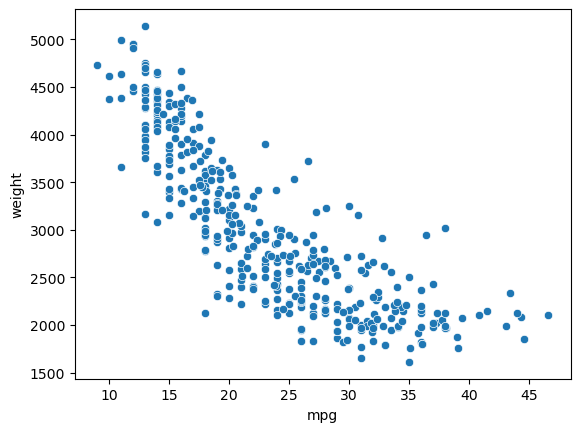

In [8]:
import seaborn as sns
sns.scatterplot( x = df_cars['mpg'],y=df_cars['weight'])

## **Data Integration - Challenge 1**

In the Lab6 subdirectory in the course repo, there are 9 spreadsheets of microbiome data that was acquired from RNA sequencing procedures from 9 different patients. Containing the biological name of the microbiome found and their count.


Write code that imports each of the data spreadsheets and combines them into a single DataFrame.

In [85]:
import pandas as pd

In [36]:
meta_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\metadata.xls")

In [37]:
meta_df

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,NaN
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


In [38]:
MID1_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID1.xls")
MID2_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID2.xls")
MID3_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID3.xls")
MID4_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID4.xls")
MID5_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID5.xls")
MID6_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID6.xls")
MID7_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID7.xls")
MID8_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID8.xls")
MID9_df = pd.read_excel(r"C:\Users\moham\Downloads\Lab 6\microbiome\MID9.xls")

display(MID1_df,MID2_df,MID3_df,MID4_df,MID5_df,MID6_df,MID7_df,MID8_df,MID9_df)

,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
...,...,...
266,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",9
267,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales...",1
268,Bacteria Cyanobacteria Cyanobacteria Chloropl...,2
269,Bacteria Cyanobacteria Cyanobacteria Chloropl...,85


,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",2
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",14
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",23
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
...,...,...
282,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",15
283,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",22
284,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1
285,Bacteria Cyanobacteria Cyanobacteria Chloropl...,2


,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",1
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",15
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",14
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",4
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
...,...,...
361,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1
362,Bacteria Cyanobacteria Cyanobacteria Chloropl...,4
363,Bacteria Cyanobacteria Cyanobacteria Chloropl...,54
364,Bacteria OD1 OD1_genera_incertae_sedis,1


,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",2
0,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",1
1,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1
2,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1
3,"Archaea ""Euryarchaeota"" Methanopyri Methanopyr...",10
4,"Archaea ""Euryarchaeota"" Thermoplasmata Thermop...",1
...,...,...
128,"Bacteria ""Synergistetes"" Synergistia Synergist...",1
129,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",13
130,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",4
131,Bacteria Cyanobacteria Cyanobacteria Chloropl...,6


,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Acidilobaceae Acidilobus",5
0,"Archaea ""Crenarchaeota"" Thermoprotei Acidiloba...",26
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",28
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",5
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
...,...,...
373,"Bacteria ""Verrucomicrobia"" Opitutae Puniceicoc...",4
374,Bacteria Cyanobacteria Cyanobacteria Chloropl...,2
375,Bacteria Cyanobacteria Cyanobacteria Chloropl...,5
376,Bacteria Cyanobacteria Cyanobacteria Chloropl...,59


,"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
3,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",5
4,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",4
...,...,...
175,"Bacteria ""Thermodesulfobacteria"" Thermodesulfo...",2
176,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",12
177,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",11
178,"Bacteria ""Verrucomicrobia"" Verrucomicrobiae Ve...",1


,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",1
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",8
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
3,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
4,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",1
...,...,...
389,"Bacteria ""Verrucomicrobia"" Subdivision3 Subd...",4
390,"Bacteria ""Verrucomicrobia"" Verrucomicrobiae Ve...",9
391,"Bacteria ""Verrucomicrobia"" Verrucomicrobiae Ve...",39
392,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1


,"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",1
0,"Archaea ""Euryarchaeota"" Methanopyri Methanopyr...",9
1,"Bacteria ""Actinobacteria"" Actinobacteria Nitri...",1
2,"Bacteria ""Aquificae"" Aquificae Aquificales Aqu...",1
3,"Bacteria ""Bacteroidetes"" Bacteroidetes_incer...",2
4,"Bacteria ""Bacteroidetes"" ""Bacteroidia"" ""Bacter...",20
...,...,...
93,"Bacteria ""Thermodesulfobacteria"" Thermodesulfo...",1
94,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",4
95,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",2
96,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1


,"Archaea ""Crenarchaeota"" Thermoprotei Acidilobales Caldisphaeraceae Caldisphaera",1
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",16
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",5
3,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",6
4,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",2
...,...,...
275,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",43
276,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",16
277,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales...",1
278,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1


In [76]:
MID9_df['patient Name'] = 'MID9'

In [67]:
MID9_df

,biological name,count,patient Name
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",16,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",5,MID1
3,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",6,MID1
4,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",2,MID1
...,...,...,...
275,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",43,MID1
276,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",16,MID1
277,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales...",1,MID1
278,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1,MID1


In [77]:
new_column_names = ['biological name', 'count','patient Name']
MID9_df.rename(columns=dict(zip(MID9_df.columns, new_column_names)), inplace=True)
MID9_df


,biological name,count,patient Name
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",16,MID9
1,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID9
2,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",5,MID9
3,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",6,MID9
4,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",2,MID9
...,...,...,...
275,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",43,MID9
276,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",16,MID9
277,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales...",1,MID9
278,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1,MID9


In [78]:
all_df = pd.concat([MID1_df, MID2_df,MID3_df,MID4_df,MID5_df,MID6_df,MID7_df,MID8_df,MID9_df],axis=0, ignore_index=True)
all_df

,biological name,count,patient Name
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
...,...,...,...
2382,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",43,MID9
2383,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",16,MID9
2384,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales...",1,MID9
2385,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1,MID9


In [81]:
df_final = pd.merge(all_df, meta_df, how='outer' , left_on='patient Name', right_on='BARCODE' )

In [83]:
df_final.drop(columns='patient Name' , inplace= True)

In [84]:
df_final

,biological name,count,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,NaN
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,NaN
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,NaN
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,NaN
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,NaN
...,...,...,...,...,...
2382,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",43,MID9,Control 2,stool
2383,"Bacteria ""Thermotogae"" Thermotogae Thermotogal...",16,MID9,Control 2,stool
2384,"Bacteria ""Verrucomicrobia"" Opitutae Opitutales...",1,MID9,Control 2,stool
2385,Bacteria Cyanobacteria Cyanobacteria Chloropl...,1,MID9,Control 2,stool


## **Categorical Dependence - Challenge 2**

### The Adult Income Dataset

The [Adult Income Dataset](https://raw.githubusercontent.com/mervatkheir/CSEN1095-Data-Engineering/master/data/income_data.csv) includes data about an individual’s annual income. Intuitively, income is influenced by the individual’s education level, age, gender, occupation, and etc. The dataset contains 14 columns detailing attributes related to the demographics and other features that describe a person. The target attribute, Income, is divide into two classes: <=50K and >50K. A description of the attributes follows:

<b>age</b>: continuous.
<br><b>workclass</b>: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
<br><b>fnlwgt</b>: continuous.
<br><b>education</b>: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
<br><b>education-num</b>: continuous.
<br><b>marital-status</b>: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
<br><b>occupation</b>: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
<br><b>relationship</b>: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
<br><b>race</b>: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
<br><b>gender</b>: Female, Male.
<br><b>capital-gain</b>: continuous.
<br><b>capital-loss</b>: continuous.
<br><b>hours-per-week</b>: continuous.
<br><b>native-country</b>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
<br><b>income</b>: >50K, <=50K

Write code that will compute the correlation between the `race` and `education` attributes. Is there a correlation or are the attributes independent?

#### Answer

* The relationship is weak   
Correlation between 'race' and 'education': 0.02923904281012609

In [ ]:
url = "https://raw.githubusercontent.com/mervatkheir/CSEN1095-Data-Engineering/master/data/income_data.csv"
df = pd.read_csv(url)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,race_encoded,education_encoded
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,2,1
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,4,11
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,4,7
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,2,15
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns


# Create a contingency table for 'race' and 'education'
contingency_table = pd.crosstab(df['race'], df['educational-num'])

# Perform chi-square test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print(f"P-value for chi-square test: {p}")

# Check if the result is statistically significant (you can choose a significance level, e.g., 0.05)
if p < 0.05:
    print("There is a significant relationship between 'race' and 'education'.")
else:
    print("There is no significant relationship between 'race' and 'education'.")


P-value for chi-square test: 7.472985630265706e-179
There is a significant relationship between 'race' and 'education'.


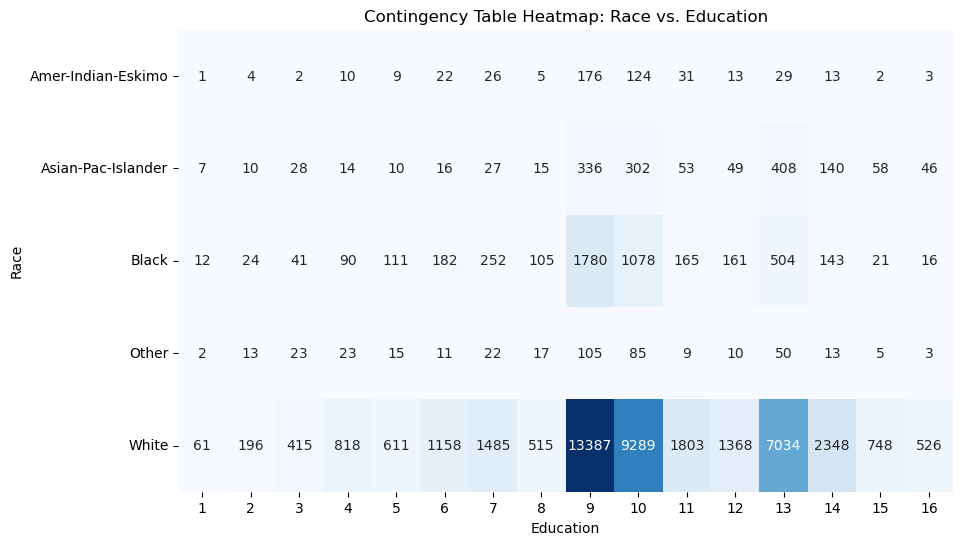

In [ ]:


# Create a contingency table for 'race' and 'education'
contingency_table = pd.crosstab(df['race'], df['educational-num'])

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Contingency Table Heatmap: Race vs. Education')
plt.xlabel('Education')
plt.ylabel('Race')
plt.show()


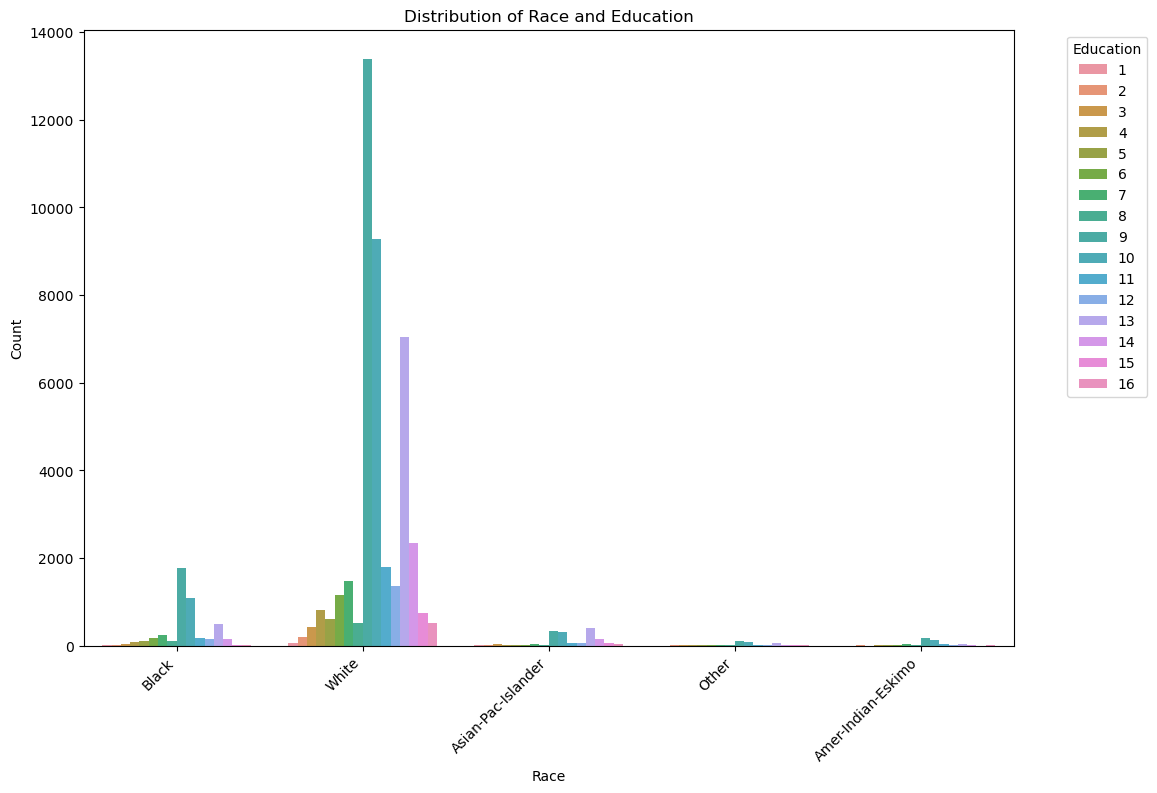

In [ ]:
# Create a grouped bar chart
plt.figure(figsize=(12, 8))
sns.countplot(x='race', hue='educational-num', data=df)
plt.title('Distribution of Race and Education')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Education', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Using Label Encoding

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Use label encoding for 'race' and 'education'
label_encoder = LabelEncoder()
df['race_encoded'] = label_encoder.fit_transform(df['race'])
df['education_encoded'] = label_encoder.fit_transform(df['educational-num'])
df_subset = df[['race_encoded', 'education_encoded']]


In [ ]:
df['education_encoded'] .unique()

array([ 6,  8, 11,  9,  5, 14,  3, 12, 13, 15,  2, 10,  4,  7,  1,  0],
      dtype=int64)

In [ ]:
df['race_encoded'].unique()

array([2, 4, 1, 3, 0])

In [ ]:
correlation = df['race_encoded'].corr(df['education_encoded'])

# Print the correlation coefficient
print(f"Correlation between 'race' and 'education': {correlation}")

Correlation between 'race' and 'education': 0.02923904281012609


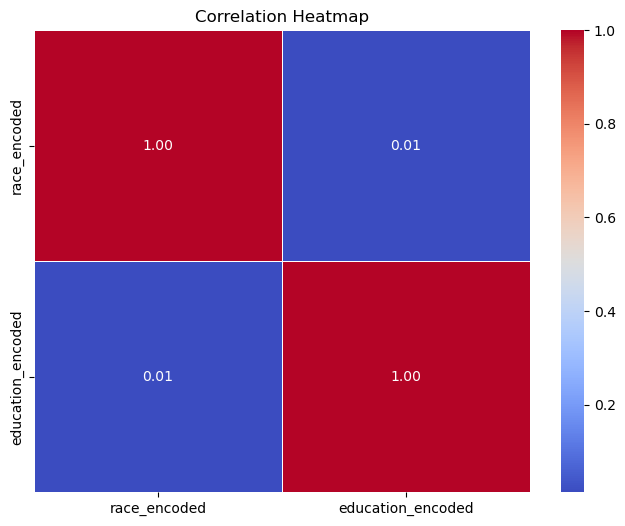

In [ ]:

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


# Use label encoding for 'race' and 'education'
label_encoder = LabelEncoder()
df['race_encoded'] = label_encoder.fit_transform(df['race'])
df['education_encoded'] = label_encoder.fit_transform(df['education'])
df_subset = df[['race_encoded', 'education_encoded']]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_subset), columns=df_subset.columns)

# Calculate the Pearson correlation coefficient
correlation_matrix = df_scaled.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   race_encoded       48842 non-null  float64
 1   education_encoded  48842 non-null  float64
dtypes: float64(2)
memory usage: 763.3 KB


In [ ]:
df_scaled.head()

,race_encoded,education_encoded
0,0.5,0.066667
1,1.0,0.733333
2,1.0,0.466667
3,0.5,1.000000
4,1.0,1.000000


In [ ]:
print(df_subset.columns)

Index(['race_encoded', 'education_encoded'], dtype='object')
